# ST340 Programming for data science
## Ben Graham and Anthony Lee 2015/16
## Lab 9 / Homework 3
## Simple neural networks in Python/Numpy

# Student Name: Pek Zhi XUan
# Student Number: 1300235

mnist['train']['X'].shape:  (10000, 784)
mnist['train']['Y'].shape:  (10000,)
mnist['test']['X'].shape:  (1000, 784)
mnist['test']['Y'].shape:  (1000,)
5


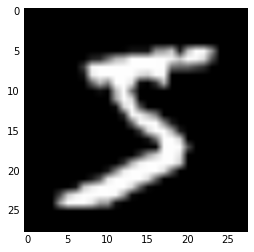

0


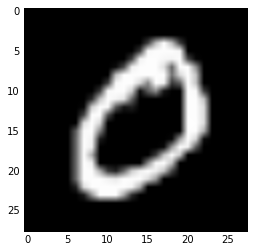

4


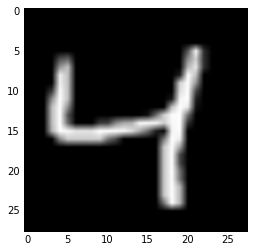

1


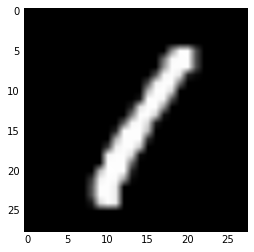

9


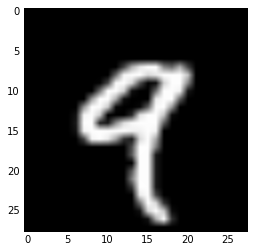

2


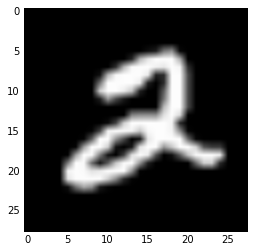

1


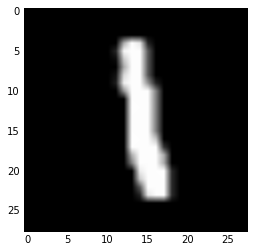

3


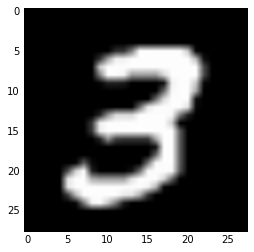

1


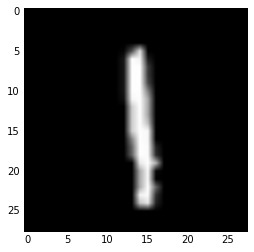

4


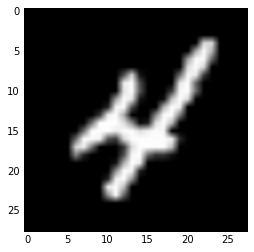

In [2]:
##This is not a question:
##Just load some data

%matplotlib inline
import numpy as np, pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(31415)

a=open("lab9.pickle","rb")
mnist,cifar10=pickle.load(a) #Load subsets of the MNIST and CIFAR10 datasets
a.close()

print("mnist['train']['X'].shape: ",mnist['train']['X'].shape)
print("mnist['train']['Y'].shape: ",mnist['train']['Y'].shape)
print("mnist['test']['X'].shape: ",mnist['test']['X'].shape)
print("mnist['test']['Y'].shape: ",mnist['test']['Y'].shape)
  
#Show some pictures
for i in range(10):
    print(mnist['train']['Y'][i])
    plt.imshow(mnist['train']['X'][i].reshape((28,28)), cmap = cm.Greys_r)
    plt.show()

#print("cifar10['train']['X'].shape: ",cifar10['train']['X'].shape)
#print("cifar10['train']['Y'].shape: ",cifar10['train']['Y'].shape)
#print("cifar10['test']['X'].shape: ",cifar10['test']['X'].shape)
#print("cifar10['test']['Y'].shape: ",cifar10['test']['Y'].shape)

#Show some pictures
#cifar_labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#for i in range(10):
#    print(cifar_labels[cifar10['train']['Y'][i]])
#    plt.imshow(cifar10['train']['X'][i].reshape((32,32,3)))
#    plt.show()

Here is a simple program for building and training a neural network to learn MNIST, with softmax output

In [3]:
class fullyConnectedLayer:
    def __init__(self,nIn,nOut):
        self.W=np.random.uniform(-0.1,0.1,(nIn,nOut))
        self.B=np.zeros((1,nOut))
    def forward(self,input):
        self.input=input
        self.output=np.dot(input,self.W)+self.B
    def backward(self,d_output,learning_rate):
        self.d_input=np.dot(d_output,self.W.T)
        d_W=np.dot(self.input.T,d_output)
        d_B=d_output.sum(0,keepdims=True)
        self.W-=d_W*learning_rate
        self.B-=d_B*learning_rate
class sigmoid:
    def forward(self,input):
        self.input=input
        self.output=1/(1+np.exp(-input))
    def backward(self,d_output,learning_rate):
        self.d_input=d_output*self.output*(1-self.output)
class nll_softmax:
    def compare(self,x,target):
        target_one_hot=np.eye(10)[target]
        x=x-x.max(1,keepdims=True)
        x=np.exp(x)
        x=x/x.sum(1,keepdims=True)
        self.cost=-np.log(x[np.arange(x.shape[0]),target]).mean()
        self.prediction=x.argmax(1)
        self.d_prediction=x-target_one_hot
        return {'Cost':self.cost,"Errors":(self.prediction!=target).mean()}
class nn:
    def __init__(self,layers):
        self.layers=layers
        self.cost=nll_softmax()
        self.trainProgress=[]
        self.testProgress=[]
    def forward(self,x):
        for l in self.layers:
            l.forward(x)
            x=l.output
    def backward(self,dx,learning_rate):
        dx=self.cost.d_prediction
        for l in self.layers[::-1]:
            l.backward(dx,learning_rate)
            dx=l.d_input
    def train(self,x,y,learning_rate):
        self.forward(x)
        self.trainProgress.append(self.cost.compare(self.layers[-1].output,y)) #Writes into d_predicition (error in predic)
        self.backward(self.cost.d_prediction,learning_rate)
    def test(self,x,y):
        self.forward(x)
        self.testProgress.append(self.cost.compare(self.layers[-1].output,y))
        if c%100 == 0:
            print(self.cost.compare(self.layers[-1].output,y))
        

NOTE: In above, I have edited the nn class to only print the cost and errors every 100 batches.

In [4]:
#(a) Experiment with the following code to train a neural network for MNIST
#    In this section you can changing the hidden layer size (100), 
#    the number of training epochs (10), and the learningRate
#    Hint: don't spend too long training each network, just get a feel for what is going on.

dataset=mnist
nInputFeatures=dataset['train']['X'].shape[1]
nClasses=10
learningRate=0.0001
nEpochs=20
n=nn([fullyConnectedLayer(nInputFeatures,100),
      sigmoid(),
      fullyConnectedLayer(100,nClasses)])
for i in range(nEpochs):
    n.train(dataset['train']['X'],dataset['train']['Y'],learningRate)
    n.test(dataset['test']['X'],dataset['test']['Y'])
print("Training and test cost")
plt.subplot(1,2,1)
plt.plot([x['Cost'] for x in n.trainProgress[1:]])
plt.subplot(1,2,2)
plt.plot([x['Cost'] for x in n.testProgress[1:]])
plt.show()
print("Training and test errors")
plt.subplot(1,2,1)
plt.plot([x['Errors'] for x in n.trainProgress])
plt.subplot(1,2,2)
plt.plot([x['Errors'] for x in n.testProgress])
plt.show()

D:\OneDrive\WinPython-64bit-3.5.1.3\python-3.5.1.amd64\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: overflow encountered in exp


NameError: name 'c' is not defined

{'Cost': 2.1198907745414388, 'Errors': 0.55800000000000005}


D:\OneDrive\WinPython-64bit-3.5.1.3\python-3.5.1.amd64\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: overflow encountered in exp


{'Cost': 1.635270317777809, 'Errors': 0.41499999999999998}
{'Cost': 1.2287493947777883, 'Errors': 0.30599999999999999}
{'Cost': 0.99665829878971768, 'Errors': 0.26700000000000002}
{'Cost': 0.87059729377375894, 'Errors': 0.22500000000000001}
{'Cost': 0.77536282388722066, 'Errors': 0.19800000000000001}
{'Cost': 0.68889327933658417, 'Errors': 0.18099999999999999}
{'Cost': 0.63006198307246419, 'Errors': 0.155}
{'Cost': 0.59019091063650775, 'Errors': 0.14399999999999999}
{'Cost': 0.56545304731996648, 'Errors': 0.14499999999999999}
1000
Training and test cost


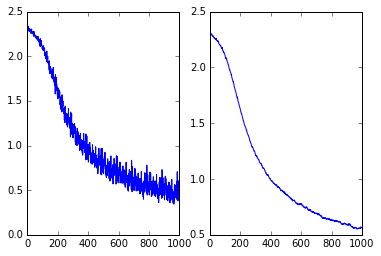

Training and test errors


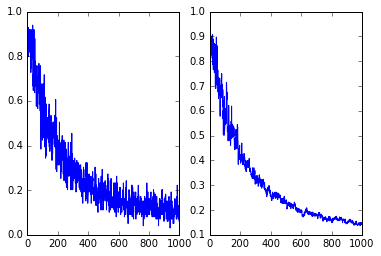

In [5]:
#(b) Implement mini-batch gradient descent by modifying the above code
#    Instead of calling "n.train" once per epoch, split the data up into "mini-batches" of size ~100
#    Hint: If X is a matrix, then X[a:b] selects the rows a,a+1,...,b-2,b-1 from X
#    Now try training a neural network for MNIST. Try adding extra layers. Try changing the learning rate.
class nn:
    def __init__(self,layers):
        self.layers=layers
        self.cost=nll_softmax()
        self.trainProgress=[]
        self.testProgress=[]
    def forward(self,x):
        for l in self.layers:
            l.forward(x)
            x=l.output
    def backward(self,dx,learning_rate):
        dx=self.cost.d_prediction
        for l in self.layers[::-1]:
            l.backward(dx,learning_rate)
            dx=l.d_input
    def train(self,x,y,learning_rate):
        self.forward(x)
        self.trainProgress.append(self.cost.compare(self.layers[-1].output,y))
        self.backward(self.cost.d_prediction,learning_rate)
    def test(self,x,y):
        self.forward(x)
        self.testProgress.append(self.cost.compare(self.layers[-1].output,y))
        if c%100 == 0:
            print(self.cost.compare(self.layers[-1].output,y))

dataset=mnist
nInputFeatures=dataset['train']['X'].shape[1]
nClasses=10
learningRate=0.001
BatchSize=100
nEpochs=10
n=nn([fullyConnectedLayer(nInputFeatures,100),
      sigmoid(),
      fullyConnectedLayer(100,100), 
      sigmoid(),      
      fullyConnectedLayer(100,nClasses)])

c=0
for i in range(nEpochs):
    j=0
    while j < dataset['train']['X'].shape[0] :
        newRate=learningRate/(1+c*0.001)
        c+=1
        n.train(dataset['train']['X'][j:j+(BatchSize-1)],dataset['train']['Y'][j:j+(BatchSize-1)],newRate)
        n.test(dataset['test']['X'],dataset['test']['Y'])
        j+=BatchSize
    
print(c)
print("Training and test cost")
plt.subplot(1,2,1)
plt.plot([x['Cost'] for x in n.trainProgress[1:]])
plt.subplot(1,2,2)
plt.plot([x['Cost'] for x in n.testProgress[1:]])
plt.show()
print("Training and test errors")
plt.subplot(1,2,1)
plt.plot([x['Errors'] for x in n.trainProgress])
plt.subplot(1,2,2)
plt.plot([x['Errors'] for x in n.testProgress])
plt.show()

As opposed to updating the model once per epoch, we examine the data in 100 point batches before we update the model. This allows us to update the model many times in one epoch. This means, by considering the data set the same number of times (10 in this case), we are able to train the network much more than if we trained it using the entire training set.

To reflect this change, the learning rate has been increased to 0.001. Further, I have set the learning rate to decrease as the training goes on. This is to hopefully increase the speed at which the network is trained as the errors decrease. An extra hidden layer has been added to the model as well. From the graph we can see that at 10 epochs, the errors are still decreasing. If we were to let the model run for longer, we will be able to reduce the error even further, achieving an error rate of 13.8% in 10 epochs.

{'Cost': 0.72310062596314129, 'Errors': 0.23699999999999999}
{'Cost': 0.5702148821386781, 'Errors': 0.189}
{'Cost': 0.50685313205253035, 'Errors': 0.16600000000000001}
{'Cost': 0.46474371218343546, 'Errors': 0.14899999999999999}
{'Cost': 0.4349677332000218, 'Errors': 0.13800000000000001}
{'Cost': 0.41846454357749541, 'Errors': 0.13}
{'Cost': 0.40580010845364556, 'Errors': 0.125}
{'Cost': 0.39460879431190826, 'Errors': 0.11899999999999999}
{'Cost': 0.38693816710736528, 'Errors': 0.11600000000000001}
{'Cost': 0.38190244762231135, 'Errors': 0.112}
1000
Training and test cost


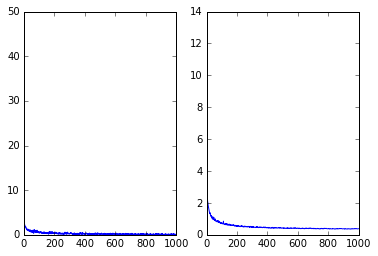

Training and test errors


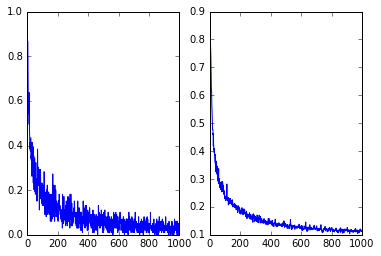

In [6]:
#(c) Implement Rectified Linear Units by modifying a copy of the "sigmoid" class.
#    ReLU(x) := {x if x>0, 0 if x<=0
#    dReLU(x)/dx := {1 if x>0, 0 if x<=0 
#    Hint: Use the numpy command "np.where"
#    Now try training a neural network for MNIST.
class rlu:
    def forward(self,input):
        self.input=input
        self.output=np.where(input>0,input,0)
    def backward(self,d_output,learning_rate):
        self.d_input=d_output*np.where(self.output>0,1,0)
        
dataset=mnist
nInputFeatures=dataset['train']['X'].shape[1]
nClasses=10
learningRate=0.00009

BatchSize=100
nEpochs=10
n=nn([fullyConnectedLayer(nInputFeatures,100),
      rlu(),
      fullyConnectedLayer(100,100), 
      rlu(),
      fullyConnectedLayer(100,100), 
      rlu(),
      fullyConnectedLayer(100,nClasses)])

c=0
for i in range(nEpochs):
    j=0
    while j < dataset['train']['X'].shape[0] :
        newRate=learningRate/(1+c*0.001)
        c+=1
        n.train(dataset['train']['X'][j:j+(BatchSize-1)],dataset['train']['Y'][j:j+(BatchSize-1)],newRate)
        n.test(dataset['test']['X'],dataset['test']['Y'])
        j+=BatchSize
    
print(c)
print("Training and test cost")
plt.subplot(1,2,1)
plt.plot([x['Cost'] for x in n.trainProgress[1:]])
plt.subplot(1,2,2)
plt.plot([x['Cost'] for x in n.testProgress[1:]])
plt.show()
print("Training and test errors")
plt.subplot(1,2,1)
plt.plot([x['Errors'] for x in n.trainProgress])
plt.subplot(1,2,2)
plt.plot([x['Errors'] for x in n.testProgress])
plt.show()

In this part, I added an extra layer to the network and used rectified linear units instead of the sigmoid function. By updating the learning rate as needed, this model has less an error rate of 9% in 10 epochs, an improvement over the previous model.

{'Errors': 0.20799999999999999, 'Cost': 0.69500045504851504}
{'Errors': 0.16900000000000001, 'Cost': 0.57496337787387441}
{'Errors': 0.13100000000000001, 'Cost': 0.49277311623988557}
{'Errors': 0.104, 'Cost': 0.38589750123243688}
{'Errors': 0.094, 'Cost': 0.36252975848121183}
{'Errors': 0.083000000000000004, 'Cost': 0.32459904573444465}
{'Errors': 0.092999999999999999, 'Cost': 0.32236847814219921}
{'Errors': 0.075999999999999998, 'Cost': 0.30061115575686187}
{'Errors': 0.073999999999999996, 'Cost': 0.30130251902405703}
{'Errors': 0.076999999999999999, 'Cost': 0.31431415216819475}
{'Errors': 0.074999999999999997, 'Cost': 0.26525440626710123}
{'Errors': 0.074999999999999997, 'Cost': 0.31108620042988433}
{'Errors': 0.078, 'Cost': 0.29431738834013343}
{'Errors': 0.070000000000000007, 'Cost': 0.2847286573505593}
{'Errors': 0.065000000000000002, 'Cost': 0.25824866583492301}
{'Errors': 0.067000000000000004, 'Cost': 0.27010971517864024}
{'Errors': 0.075999999999999998, 'Cost': 0.28592170053835

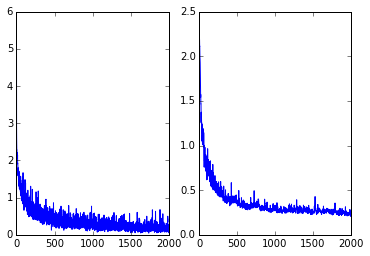

Training and test errors


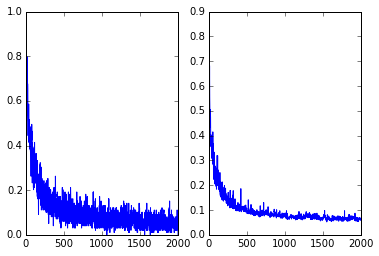

In [33]:
#(d) Implement dropout and add it to your network using a new class
#    Hint: use np.random.binomial to generate a "mask" of 0s and 1s and then multiply the input by that.
#    Hint: apply 20% dropout to the input layer, and then 50% dropout to each of the hidden layers
#    Now try training a neural network for MNIST.
#class nn:
#    def __init__(self,layers):
#        self.layers=layers
#        self.cost=nll_softmax()
#        self.trainProgress=[]
#        self.testProgress=[]
#    def forward(self,x):
#        for l in self.layers:
#            l.forward(x)
#            x=l.output
#    def backward(self,dx,learning_rate):
#        dx=self.cost.d_prediction
#        for l in self.layers[::-1]:
#            l.backward(dx,learning_rate)
#            dx=l.d_input
#    def train(self,x,y,learning_rate):
#        self.forward(x)
#        self.trainProgress.append(self.cost.compare(self.layers[-1].output,y))
#        self.backward(self.cost.d_prediction,learning_rate)
#    def test(self,x,y):
#        self.forward(x)
#        self.testProgress.append(self.cost.compare(self.layers[-1].output,y))
#        print(self.cost.compare(self.layers[-1].output,y))      

class dropout:
    def __init__(self,dChance):
        self.q=1-dChance
    def forward(self,input):
        self.input=input
        self.mask=np.random.binomial(np.ones(input.shape,dtype='int32'),self.q)
        if training==True:
            self.output=self.mask*input
        else:
            self.output=input*self.q
    def backward(self,d_output,learning_rate):
        self.d_input=d_output*self.mask
        
dataset=mnist
nInputFeatures=dataset['train']['X'].shape[1]
nClasses=10
learningRate=0.001

BatchSize=100
nEpochs=20
n=nn([fullyConnectedLayer(nInputFeatures,100),
      dropout(0.2),
      rlu(),
      fullyConnectedLayer(100,100), 
      dropout(0.5),
      rlu(),  
      fullyConnectedLayer(100,100), 
      dropout(0.5),
      rlu(),
      fullyConnectedLayer(100,nClasses)])

c=0
for i in range(nEpochs):
    j=0
    while j < dataset['train']['X'].shape[0] :
        newRate=learningRate/(1+c*0.0001)
        c+=1
        training=True
        n.train(dataset['train']['X'][j:j+(BatchSize-1)],dataset['train']['Y'][j:j+(BatchSize-1)],newRate)
        training=False
        n.test(dataset['test']['X'],dataset['test']['Y'])
        j+=BatchSize
    
print(c)
print("Training and test cost")
plt.subplot(1,2,1)
plt.plot([x['Cost'] for x in n.trainProgress[1:]])
plt.subplot(1,2,2)
plt.plot([x['Cost'] for x in n.testProgress[1:]])
plt.show()
print("Training and test errors")
plt.subplot(1,2,1)
plt.plot([x['Errors'] for x in n.trainProgress])
plt.subplot(1,2,2)
plt.plot([x['Errors'] for x in n.testProgress])
plt.show()

In part (d), dropout was implemented into the model. As can be seen from the results above, the increase in accuracy is great. At 20 epochs, the error has decreased to roughly 6%. Even at 10 epochs, the errors have already decreased to about 7.5%, an improvement over the previous model. While the reduction in errors and cost has slowed down, if the model is run for a longer period of time, the errors could possibly be reduced further.

Dropout allows us to prevent errors that occur from overfitting the model by "pruning" some of the network while training. This results in the improved accuracy as seen here.

{'Errors': 0.89800000000000002, 'Cost': 2.3025646692067339}
{'Errors': 0.89800000000000002, 'Cost': 2.3005100274384866}
{'Errors': 0.89100000000000001, 'Cost': 2.2958602463408608}
{'Errors': 0.875, 'Cost': 2.2824454034790418}
{'Errors': 0.85699999999999998, 'Cost': 2.2580199541786627}
{'Errors': 0.83199999999999996, 'Cost': 2.2141642274821445}
{'Errors': 0.82799999999999996, 'Cost': 2.2078958475985182}
{'Errors': 0.83499999999999996, 'Cost': 2.2039678066606911}
{'Errors': 0.83299999999999996, 'Cost': 2.177024133318695}
{'Errors': 0.83499999999999996, 'Cost': 2.1688173973571336}
{'Errors': 0.82899999999999996, 'Cost': 2.1695224402307387}
{'Errors': 0.81299999999999994, 'Cost': 2.1740203321016236}
{'Errors': 0.81100000000000005, 'Cost': 2.1548080995340793}
{'Errors': 0.81100000000000005, 'Cost': 2.1467715695316203}
{'Errors': 0.80800000000000005, 'Cost': 2.1452973847976802}
{'Errors': 0.80200000000000005, 'Cost': 2.1425547318033287}
{'Errors': 0.80000000000000004, 'Cost': 2.1413689630186

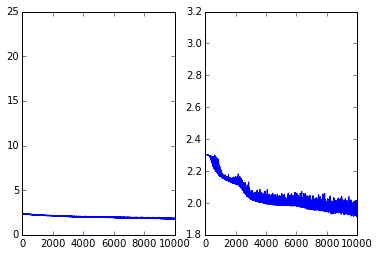

Training and test errors


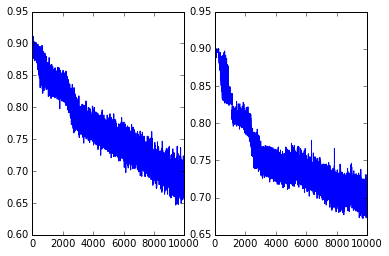

In [23]:
#(e) Try and train a network for the subset of CIFAR-10
#   Hint: It is a much harder problem so if you get ~50% accuracy using a fully 
#   connected network you are doing well.
#   (Not part of the homework: If you want to get an idea about what kind of mistakes 
#   the network is making, you can create a "contingency table" showing the frequency 
#   with which class i is predicted to be class j. 
#
#   Also not part of the homework: For better results, look up convolutional neural networks.)

        
dataset=cifar10
nInputFeatures=dataset['train']['X'].shape[1]
nClasses=10
learningRate=0.00001

BatchSize=1000
nEpochs=1000
n=nn([fullyConnectedLayer(nInputFeatures,100),
      dropout(0.2),
      rlu(),
      fullyConnectedLayer(100,100), 
      dropout(0.5),
      fullyConnectedLayer(100,100), 
      dropout(0.5),   
      fullyConnectedLayer(100,nClasses)])

c=0
for i in range(nEpochs):
    j=0
    while j < dataset['train']['X'].shape[0] :
        #newRate=learningRate/(1+c*0.0001)
        c+=1
        training=True
        n.train(dataset['train']['X'][j:j+(BatchSize-1)],dataset['train']['Y'][j:j+(BatchSize-1)],learningRate)
        training=False
        n.test(dataset['test']['X'],dataset['test']['Y'])
        j+=BatchSize
    
print(c)
print("Training and test cost")
plt.subplot(1,2,1)
plt.plot([x['Cost'] for x in n.trainProgress[1:]])
plt.subplot(1,2,2)
plt.plot([x['Cost'] for x in n.testProgress[1:]])
plt.show()
print("Training and test errors")
plt.subplot(1,2,1)
plt.plot([x['Errors'] for x in n.trainProgress])
plt.subplot(1,2,2)
plt.plot([x['Errors'] for x in n.testProgress])
plt.show()

With the CIFAR-10 data set, I have only been able to reduce the errors in the data to 70% over 1000 epochs. The errors plot shows that the errors are still decreasing, again, if the model could be run for longer periods, we could reduce the errors further. In this case, I have decided to use a constant learning rate of 0.00001. As opposed to having a decreasing learning rate, the model still seems to be learning at a roughly constant pace over the last 600 or so epochs. As such, I do not feel there is a need to decrease the learning rate as yet.

I have attempted to use 2 hidden layers of size 1000x1000 but this caused the model to stay at roughly 89% error, not much better than a completely random assignment. This could be due to overfitting, but increasing the dropout rate to 80% does not solve this problem.

Given more time and computing power, we could probably reduce the errors of this model by another 10% or more over another 1000 epochs.